In [1]:
import sys 
sys.path.append('../')

import torch 
import matplotlib.pyplot as plt
from utils import * 
from mlmm import *
from dataset import *

In [92]:
l = 7 # number of level, total number of points is 2^l-1
k = 3 # number of corase level
m = 7 # local range for correction
order = 2 # order of interpolation/restriction

In [93]:
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')
wh_mlmm, KHH, Khh_correction_lst, nbr_idx_lst = SingularSmoothKernelMLMM_full(uh, Khh, h, k, order, m)
l1 = l1_norm(wh_mlmm, wh_numeric)
rl2 = rl2_error(wh_mlmm, wh_numeric)
print("m - {:}, L1 - {:.2e}, rL2 - {:.2e}".format(m, l1, rl2))

m - 7, L1 - 9.00e-03, rL2 - 6.13e-03


In [125]:
n = 8
K = np.random.randn(1023, n)
for i in range(n//2-1):
    K[i,:n//2-i-1] = 0
    K[-i-1,-(n//2-i-1):] = 0

In [153]:
((n-1)//2 - 1)//2 + 1

4

In [161]:
n = 15
K = np.random.randn(1024, n)
for i in range((n-1)//2):
    K[i,:(n-1)//2-i*2] = 0
    K[-1-i,-((n-1)//2-i*2):] = 0

    
    if (n-1)//2 - i*2 == 1:
        break 

In [56]:
U, S, Vh = torch.linalg.svd(KHH[0][0])

In [57]:
S

tensor([103.8030, 102.3428,  99.7264,  99.0398,  98.5581,  98.3297,  98.2002])

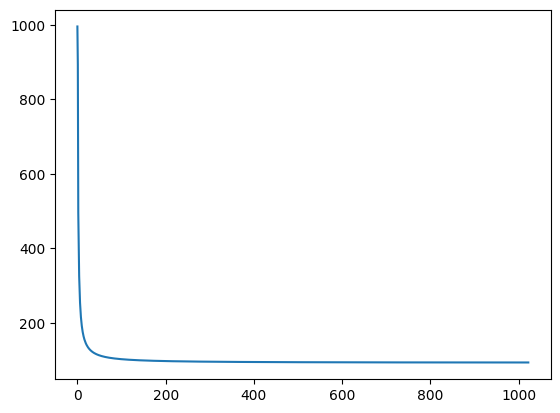

In [40]:
plt.plot(S)

In [29]:
Khh_correction_lst[0][0][0,0][0]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.3069e+01, 4.6188e+01, 5.8892e-02, 2.0411e-02, 1.0310e-02,
        6.2113e-03, 4.1494e-03, 2.9674e-03, 2.2273e-03, 1.7333e-03, 1.3869e-03,
        1.1351e-03, 9.4604e-04, 8.0061e-04, 6.8641e-04, 5.9462e-04, 5.2047e-04,
        4.5943e-04, 4.0841e-04, 3.6550e-04, 3.2878e-04, 2.9755e-04, 2.7061e-04,
        2.4700e-04, 2.2650e-04, 2.0838e-04, 1.9217e-04, 1.7810e-04, 1.6546e-04,
        1.5402e-04, 1.4377e-04, 1.3447e-04, 1.2612e-04])

In [4]:
mlformer = MLFormer(rank=4, m=7, k=3, l=13, h=h)

In [5]:
mlformer(uh.repeat(64,1,1)).shape

torch.Size([64, 1, 8191])

In [6]:
upath = './data/kernel_estimation/grf1d_N2000_s8193_m0_gamma1_tau1_sigma1_dirichlet.mat'
wpath = './data/kernel_estimation/cosine_8191.npy'
train_loader, test_loader, Khh, xh, h = load_dataset_1d(upath, wpath)

In [7]:
u, w = next(iter(train_loader))

In [8]:
rl2_error(u, w).item()

0.7860814332962036

In [9]:
for p in mlformer.parameters():
    print(p.shape)

torch.Size([1023, 4])
torch.Size([1023, 4])
torch.Size([1, 4])
torch.Size([1023, 4])
torch.Size([8, 4])
torch.Size([1, 4])
torch.Size([1024, 4])
torch.Size([15, 4])
torch.Size([1, 4])
torch.Size([2047, 4])
torch.Size([8, 4])
torch.Size([1, 4])
torch.Size([2048, 4])
torch.Size([15, 4])
torch.Size([1, 4])
torch.Size([4095, 4])
torch.Size([8, 4])
torch.Size([1, 4])
torch.Size([4096, 4])
torch.Size([15, 4])
torch.Size([1, 4])
